# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


Observable Trends Based on the Data
    1. As the latitude approaches the equator (0) from the South the temperature rises and as the latitude gets further away from the equator the temperature decreases again. 
    2. Latitude and humidty as well as latitude and cloudiness do not seem to have any correlation. 
    3. Latitude does not seem to have a correlation with wind speed. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
weather_url = "http://api.openweathermap.org/data/2.5/weather"

# Build partial query URL
#query_url = f"{weather_url}q={city}&appid={weather_api_key}"
query_url = f"{weather_url}?appid={weather_api_key}&q="

# set up lists to hold reponse info
city_info = []

print("Beginning Data Retrieval")
print("------------------------")
# Loop through the list of cities and perform a request for data on each

t0 = time.time()
count = 1 
sets = 1


for city in cities:
    url = f"{query_url}{city}"
    print(f'Processing Record {count} of Set {sets} | {city}' )
    try:
        response = requests.get(url).json()
    except:
        print("City NOT Found. Skipping...")
    if(response["cod"] != '404'):
        city_info.append(response)
    count = count + 1 
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        #time.sleep(60-(t1-t0))
        t0=time.time()
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | kyra
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | anamur
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | taolanaro
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | albac
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | clonakilty
Processing Record 17 of Set 1 | nago
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | lumeje
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | berlevag
Processing Record 22 of Set 1 | marystown
Processing Record 23 of Set 1 | naze
Processing Record 24 of Set 1 | longyea

Processing Record 49 of Set 4 | storsteinnes
Processing Record 50 of Set 4 | walldurn
Processing Record 1 of Set 5 | tual
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | nuuk
Processing Record 4 of Set 5 | sorland
Processing Record 5 of Set 5 | richards bay
Processing Record 6 of Set 5 | goderich
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | lashio
Processing Record 9 of Set 5 | san andres
Processing Record 10 of Set 5 | geraldton
Processing Record 11 of Set 5 | kruisfontein
Processing Record 12 of Set 5 | tabiauea
Processing Record 13 of Set 5 | sazonovo
Processing Record 14 of Set 5 | durban
Processing Record 15 of Set 5 | san javier
Processing Record 16 of Set 5 | norman wells
Processing Record 17 of Set 5 | praia da vitoria
Processing Record 18 of Set 5 | qitaihe
Processing Record 19 of Set 5 | kahului
Processing Record 20 of Set 5 | aksarka
Processing Record 21 of Set 5 | ayan
Processing Record 22 of Set 5 | bilibino
Processing Rec

Processing Record 49 of Set 8 | isangel
Processing Record 50 of Set 8 | lompoc
Processing Record 1 of Set 9 | almirante
Processing Record 2 of Set 9 | taoudenni
Processing Record 3 of Set 9 | along
Processing Record 4 of Set 9 | calamar
Processing Record 5 of Set 9 | margate
Processing Record 6 of Set 9 | korla
Processing Record 7 of Set 9 | storforshei
Processing Record 8 of Set 9 | labuhan
Processing Record 9 of Set 9 | west fargo
Processing Record 10 of Set 9 | suntar
Processing Record 11 of Set 9 | zlobin
Processing Record 12 of Set 9 | plettenberg bay
Processing Record 13 of Set 9 | lagoa
Processing Record 14 of Set 9 | tlaxco
Processing Record 15 of Set 9 | pizarro
Processing Record 16 of Set 9 | xuddur
Processing Record 17 of Set 9 | aginskoye
Processing Record 18 of Set 9 | mount isa
Processing Record 19 of Set 9 | cheuskiny
Processing Record 20 of Set 9 | brigham city
Processing Record 21 of Set 9 | tymovskoye
Processing Record 22 of Set 9 | manicore
Processing Record 23 of Se

Processing Record 48 of Set 12 | san pedro
Processing Record 49 of Set 12 | salalah
Processing Record 50 of Set 12 | nizhniy baskunchak
Processing Record 1 of Set 13 | manaus
Processing Record 2 of Set 13 | camopi
Processing Record 3 of Set 13 | san rafael
Processing Record 4 of Set 13 | imbituba
Processing Record 5 of Set 13 | kankan
Processing Record 6 of Set 13 | yulara
Processing Record 7 of Set 13 | umzimvubu
Processing Record 8 of Set 13 | wampusirpi
Processing Record 9 of Set 13 | nioro
Processing Record 10 of Set 13 | kailua
Processing Record 11 of Set 13 | toamasina
Processing Record 12 of Set 13 | krasnyye barrikady
Processing Record 13 of Set 13 | belyy yar
Processing Record 14 of Set 13 | miandrivazo
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_name = []
lat= []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country_name = []
date = []

for city_json in city_info:
    city_name.append(city_json["name"])
    lat.append(city_json["coord"]["lat"])
    lon.append(city_json["coord"]["lon"])
    max_temp.append(city_json["main"]["temp_max"])
    humidity.append(city_json["main"]["humidity"])
    cloudiness.append(city_json["clouds"]["all"])
    wind_speed.append(city_json["wind"]["speed"])
    country_name.append(city_json["sys"]["country"])
    date.append(city_json["dt"])


In [10]:
# create dictionary for data 
weather_dict = {
    "City": city_name,
    "Lat":lat, 
    "Lng":lon, 
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness, 
    "Wind Speed":wind_speed,
    "Country":country_name,
    "Date":date, 
}
# make dataframe and display count for each portion
weather_df = pd.DataFrame.from_dict(weather_dict,orient="index")
weather_data = weather_df.transpose()
weather_data.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [11]:
# display full dataframe 
weather_data 

# export data to a csv file 
weather_data.to_csv("./Data/weather_data.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
humidity_data= weather_data["Humidity"]
humidity_data.max()

100

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

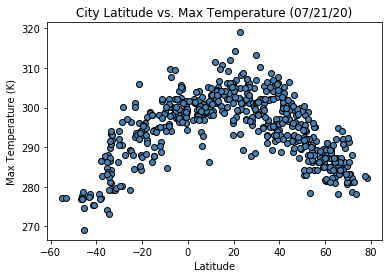

In [18]:
city_lat = weather_data["Lat"]
city_temp = weather_data["Max Temp"]
plt.scatter(city_lat, city_temp, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
# export as png file 
plt.savefig("./Data/City_Latitude_vs_Max Temperature.png")
# show plot
plt.show()

## Latitude vs. Humidity Plot

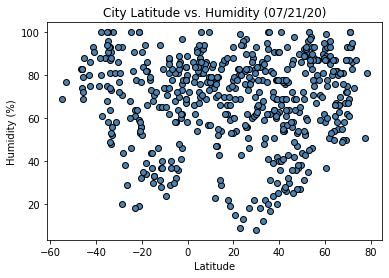

In [16]:
city_humidity = weather_data["Humidity"]
plt.scatter(city_lat, city_humidity, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (07/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# export as png file 
plt.savefig("./Data/City_Latitude_vs_Humidity.png")
# show plot
plt.show()

## Latitude vs. Cloudiness Plot

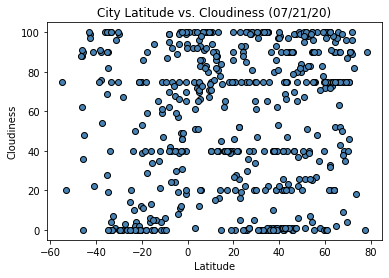

In [17]:
city_cloud = weather_data["Cloudiness"]
plt.scatter(city_lat, city_cloud, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# export as png file 
plt.savefig("./Data/City_Latitude_vs_Cloudiness.png")
# show plot
plt.show()

## Latitude vs. Wind Speed Plot

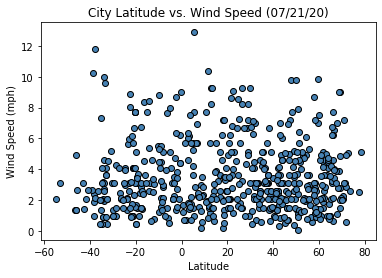

In [34]:
city_wind = weather_data["Wind Speed"]
plt.scatter(city_lat, city_wind, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/21/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# export as png file 
plt.savefig("./Data/City_Latitude_vs_WindSpeed.png")
# show plot 
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames
# create nourthern dataframe (greater than or equal to 0 degrees latitude)
northern_df = weather_data.loc[weather_data["Lat"] >= 0, :]
# create southern dataframe (less than 0 degrees latitude)
southern_df = weather_data.loc[weather_data["Lat"] <0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4886877020516309


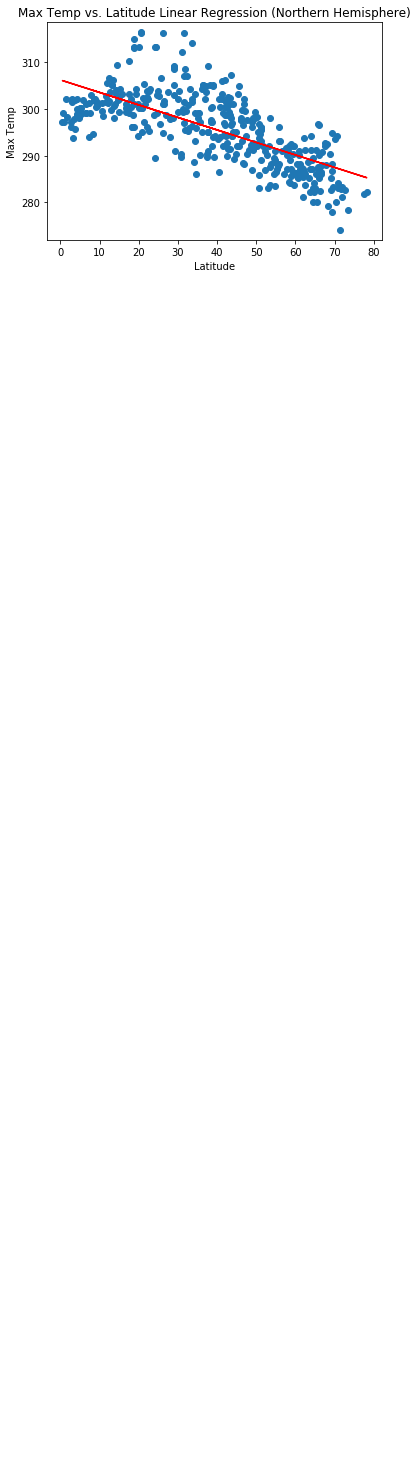

In [33]:
north_lat = northern_df["Lat"]
north_temp = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat.astype(float),north_temp.astype(float))
north_regress_values = north_lat * slope + intercept
north_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_temp)
plt.plot(north_lat,north_regress_values,"r-")
plt.annotate(north_line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Max Temp vs. Latitude Linear Regression (Northern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
# export as a png file 
plt.savefig("./Data/MaxTemp_vs_Latitude_Linear_Regression_(Northern Hemisphere).png")
# show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5898569195635114


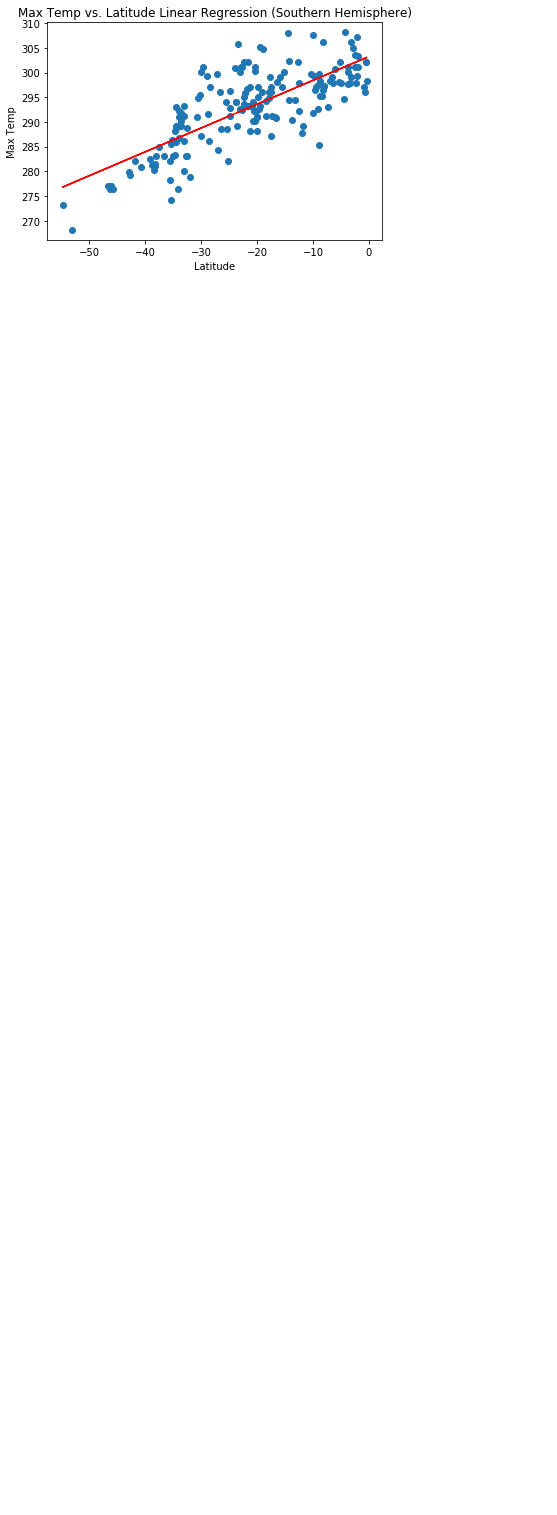

In [26]:
south_lat = southern_df["Lat"]
south_temp = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.astype(float),south_temp.astype(float))
south_regress_values = south_lat * slope + intercept
south_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_temp)
plt.plot(south_lat,south_regress_values,"r-")
plt.annotate(south_line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Max Temp vs. Latitude Linear Regression (Southern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
# export as png file 
plt.savefig("./Data/MaxTemp_vs_Latitude_Linear_Regression_(Southern_Hemisphere).png")
# show plot 
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 8.913707778257109e-07


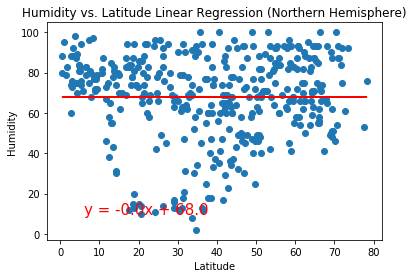

In [32]:
north_lat = northern_df["Lat"]
north_humid = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat.astype(float),north_humid.astype(float))
north_regress_values = north_lat * slope + intercept
north_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_humid)
plt.plot(north_lat,north_regress_values,"r-")
plt.annotate(north_line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs. Latitude Linear Regression (Northern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
# export as png file 
plt.savefig("./Data/Humidity_vs_Latitude_Linear_Regression(Northern_Hemisphere).png")
# show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03455863047332848


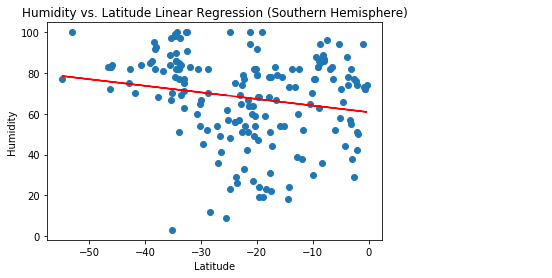

In [31]:
south_lat = southern_df["Lat"]
south_humid = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.astype(float),south_humid.astype(float))
south_regress_values = south_lat * slope + intercept
south_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_humid)
plt.plot(south_lat,south_regress_values,"r-")
plt.annotate(south_line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs. Latitude Linear Regression (Southern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
# export as png file 
plt.savefig("./Data/Humidity_vs_Latitude_Linear_Regression(Southern_Hemisphere).png")
# show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0012068888050606392


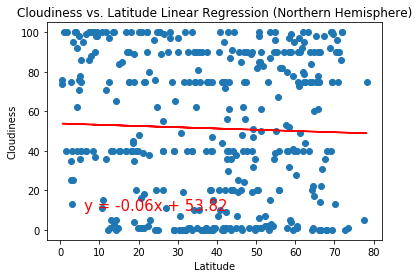

In [30]:
north_lat = northern_df["Lat"]
north_cloud = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat.astype(float),north_cloud.astype(float))
north_regress_values = north_lat * slope + intercept
north_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_cloud)
plt.plot(north_lat,north_regress_values,"r-")
plt.annotate(north_line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
# export as png file 
plt.savefig("./Data/Cloudiness_vs_Latitude_Linear_Regression(Northern_Hemisphere).png")
# show plot 
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.027875550073432887


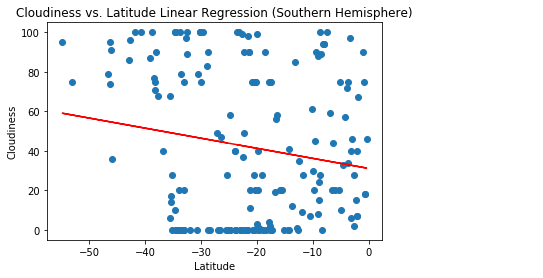

In [29]:
south_lat = southern_df["Lat"]
south_cloud = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.astype(float),south_cloud.astype(float))
south_regress_values = south_lat * slope + intercept
south_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_cloud)
plt.plot(south_lat,south_regress_values,"r-")
plt.annotate(south_line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
# export as png file 
plt.savefig("./Data/Cloudiness_vs_Latitude_Linear_Regression(Southern_Hemisphere).png")
# show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0016259476979456158


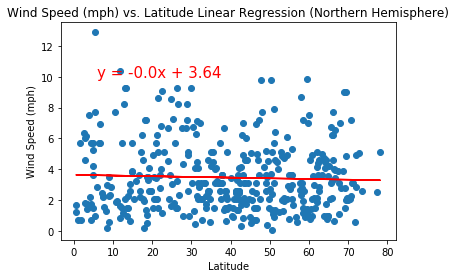

In [28]:
north_lat = northern_df["Lat"]
north_wind = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat.astype(float),north_wind.astype(float))
north_regress_values = north_lat * slope + intercept
north_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_wind)
plt.plot(north_lat,north_regress_values,"r-")
plt.annotate(north_line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed (mph) vs. Latitude Linear Regression (Northern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
# export as png file 
plt.savefig("./Data/WindSpeed_vs_Latitude_Linear_Regression(Northern_Hemisphere).png")
# show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.019470761003534637


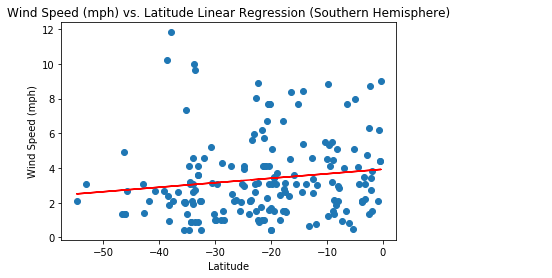

In [27]:
south_lat = southern_df["Lat"]
south_wind = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.astype(float),south_wind.astype(float))
south_regress_values = south_lat * slope + intercept
south_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_wind)
plt.plot(south_lat,south_regress_values,"r-")
plt.annotate(south_line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Wind Speed (mph) vs. Latitude Linear Regression (Southern Hemisphere)")
print(f"The r-squared is: {rvalue**2}")
# export as png file 
plt.savefig("./Data/WindSpeed_vs_Latitude_Linear_Regression(Southern_Hemisphere).png")
# show plot
plt.show()